Поработаем с таблицами, для которых на предыдущем занятии вы изучали описательные статистики.
Сформулируйте несколько гипотез для 2 групп, которые можно проверить на имеющихся данных. Укажите, зависимые или независимые выборки, ЗП, НП.
Выберите подходящий тест и проверьте ваши предположения.
Задание выполняется на языке R и предоставляется в формате Google Colab.

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# install.packages("devtools")
devtools::install_github("ropensci/skimr")

tidyselect (1.2.0  -> 1.2.1  ) [CRAN]
digest     (0.6.34 -> 0.6.35 ) [CRAN]
xfun       (0.41   -> 0.43   ) [CRAN]
htmltools  (0.5.7  -> 0.5.8.1) [CRAN]
highr      (0.9    -> 0.10   ) [CRAN]
knitr      (1.45   -> 1.46   ) [CRAN]


Installing 6 packages: tidyselect, digest, xfun, htmltools, highr, knitr

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpMEzbBt/remotes57737a62412/ropensci-skimr-d5126aa/DESCRIPTION’ ... OK
* preparing ‘skimr’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘skimr_2.1.5.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(skimr)

In [6]:
library(readxl)

In [7]:
meta <-read_xlsx('metadata.xlsx', sheet=1) %>%
  select(-Name) %>%
  rename_with(make.names)%>%
  mutate(Patient.number = as.factor(Patient.number),
         Vial.number = as.factor(Vial.number))
head(meta, n=10)

Vial.number,Patient.number,Sucrose,Group,Date,Age,Plasma.volume,Ht,Wt,BMI,⋯,r.lat.max,r.ant.max,r.pos.max,l.lat.max,l.ant.max,l.pos.max,carotid.IMT.mean,Plaque,Statins,comorbidities
<fct>,<fct>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,50,0,0,2022-03-26,63,6.5,163,84.0,31.61579,⋯,0.65,0.80,0.80,0.81,0.78,0.80,0.6425000,1,1,NA
2,51,0,0,2023-12-23,47,5.5,179,111.0,34.64311,⋯,1.03,0.92,1.03,1.03,1.03,1.09,0.8400000,1,0,NA
3,52,0,1,2022-10-10,57,7.0,164,80.0,29.74420,⋯,1.00,0.90,0.95,0.85,0.90,0.90,0.8500000,3,1,Type 2 diabetes mellitus; MI - 2016
4,53,0,1,2022-12-21,72,5.0,160,58.8,22.96875,⋯,0.91,0.97,0.98,0.86,0.74,0.80,0.8241667,2,0,1-2 times per year hypertensive crises (Corinfar)
5,54,0,1,2023-03-16,57,5.0,180,71.0,21.91358,⋯,1.20,1.20,1.25,1.10,1.30,1.13,1.0983333,1,1,NA
6,55,0,1,2023-03-25,79,6.2,160,64.0,25.00000,⋯,0.88,0.80,0.90,1.07,1.00,1.30,0.8475000,2,0,"Cholecystitis, gastritis without exacerbation. Diffuse focal changes in the thyroid gland"
7,56,0,1,2022-01-06,61,6.5,164,67.0,24.91077,⋯,0.91,0.86,0.86,0.80,0.74,0.91,0.6725000,1,0,chronic cholecystitis
8,57,0,1,2022-01-27,70,5.5,162,61.0,23.24341,⋯,1.00,1.00,1.00,0.94,0.69,0.87,0.7850000,1,0,"Cholecystectomy 20 years ago, hr.gastritis"
9,58,0,0,2023-10-20,50,6.0,150,79.0,35.11111,⋯,1.09,1.26,1.03,0.80,0.74,0.75,0.8491667,1,0,Iron-deficiency anemia


In [8]:
summary_meta <- summary(meta)
summary_meta

  Vial.number Patient.number    Sucrose           Group       
 1      : 1   37     : 2     Min.   :0.0000   Min.   :0.0000  
 2      : 1   38     : 2     1st Qu.:0.0000   1st Qu.:0.0000  
 3      : 1   39     : 2     Median :1.0000   Median :1.0000  
 4      : 1   40     : 2     Mean   :0.6316   Mean   :0.6316  
 5      : 1   42     : 2     3rd Qu.:1.0000   3rd Qu.:1.0000  
 6      : 1   43     : 2     Max.   :1.0000   Max.   :1.0000  
 (Other):32   (Other):26                                      
      Date                             Age        Plasma.volume   
 Min.   :2022-01-01 00:00:00.00   Min.   :47.00   Min.   : 5.000  
 1st Qu.:2022-05-16 12:00:00.00   1st Qu.:60.25   1st Qu.: 6.500  
 Median :2022-08-14 00:00:00.00   Median :65.00   Median :10.250  
 Mean   :2022-10-18 10:06:18.95   Mean   :65.58   Mean   : 9.453  
 3rd Qu.:2023-03-14 00:00:00.00   3rd Qu.:70.00   3rd Qu.:11.875  
 Max.   :2023-12-23 00:00:00.00   Max.   :83.00   Max.   :13.000  
                           

In [9]:
skim_results <- skimr::skim(meta)
print(skim_results)

── Data Summary ────────────────────────
                           Values
Name                       meta  
Number of rows             38    
Number of columns          48    
_______________________          
Column type frequency:           
  character                1     
  factor                   2     
  numeric                  44    
  POSIXct                  1     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 comorbidities        11         0.711  20 160     0       27          0

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable  n_missing complete_rate ordered n_unique
1 Vial.number            0             1 FALSE         38
2 Patient.number         0             1 FALSE         32
  top_counts                
1 1: 1, 2: 1, 3: 1, 4: 1    
2 37: 2

In [10]:
age_rng <- range(meta$Age)
age_median <- median(meta$Age)
for_print_age <- sprintf("Возраст пациента в выборке от %d до %d, медиана %d", age_rng[1], age_rng[2], age_median)
print(for_print_age)

[1] "Возраст пациента в выборке от 47 до 83, медиана 65"


In [11]:
bmi_rng <- range(meta$BMI)
bmi_median <- median(meta$BMI)
bmi_var <- var(meta$BMI)
for_print_bmi <- sprintf("ИМТ пациентов в выборке от %f до %f, медиана %f, дисперсия %f", bmi_rng[1], bmi_rng[2], bmi_median, bmi_var)
print(for_print_bmi)

[1] "ИМТ пациентов в выборке от 20.281233 до 38.866027, медиана 27.678743, дисперсия 27.317543"


In [12]:
smoke_range <- meta %>%
  select(Sm) %>%
  unique()
smoke_range

Sm
<dbl>
0
1


In [13]:
ch_rng <- range(meta$Choi...25)
ch_median <- median(meta$Choi...25)
ch_var <- var(meta$Choi...25)
for_print_ch <- sprintf("Холестерин у пациентов в выборке от %d до %d, медиана %d, дисперсия %0.f ", ch_rng[1], ch_rng[2], ch_median, ch_var)
print(for_print_ch)

[1] "Холестерин у пациентов в выборке от 164 до 322, медиана 240, дисперсия 1695 "


In [14]:
ah_range <- meta %>%
  select(A_H) %>%
  unique()
ah_range

A_H
<dbl>
1
0


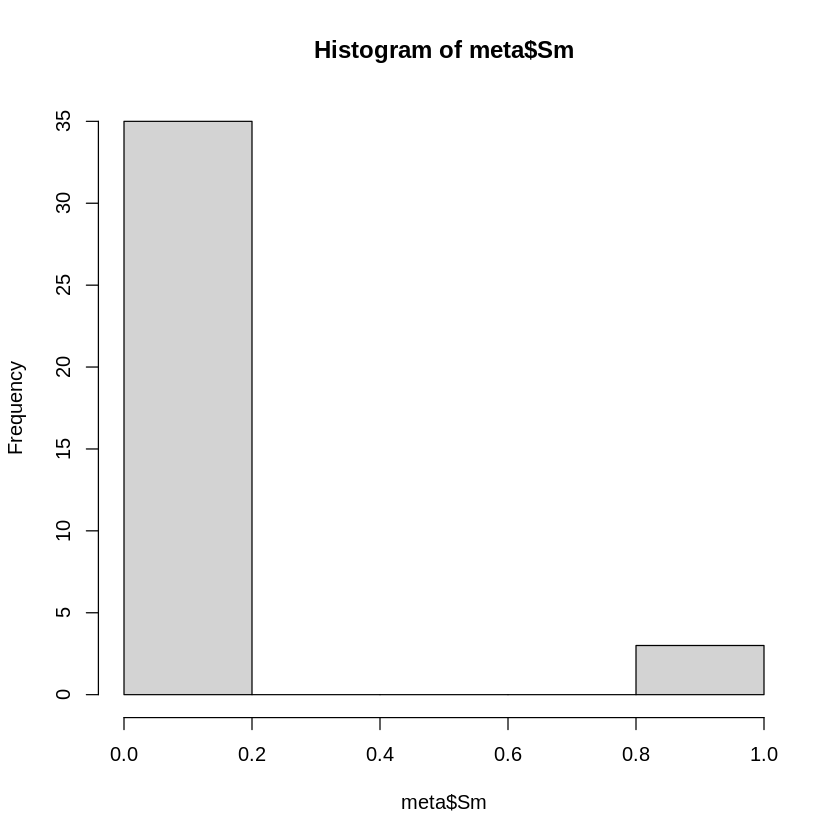

In [15]:
hist(meta$Sm)

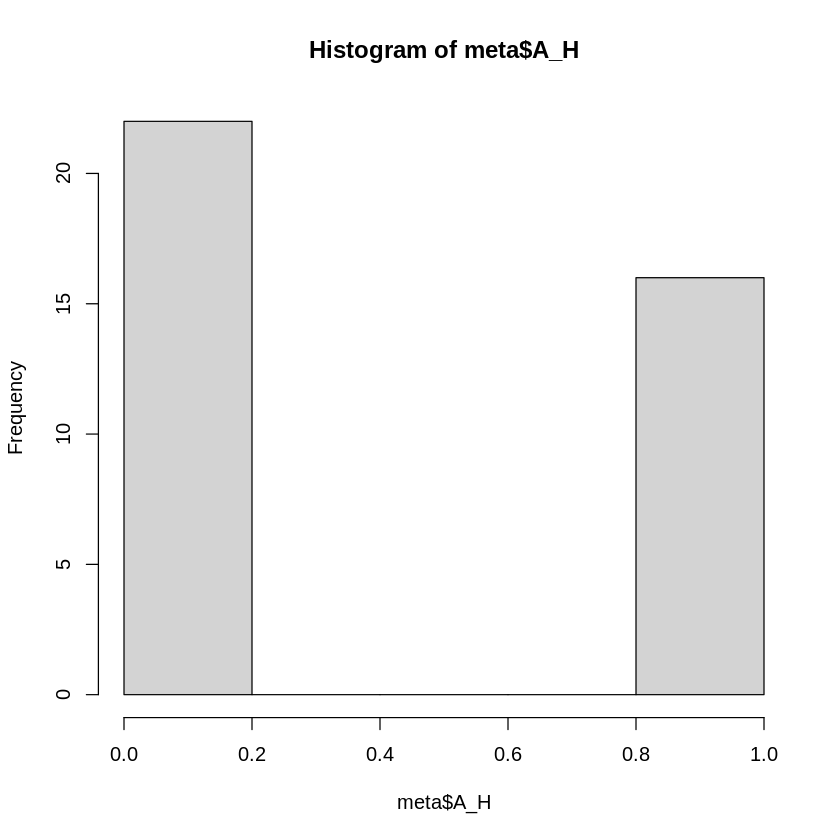

In [16]:
hist(meta$A_H)

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
Warning message:
“Use of `meta$Age` is discouraged.
ℹ Use `Age` instead.”
Warning message:
“Use of `meta$Age` is discouraged.
ℹ Use `Age` instead.”


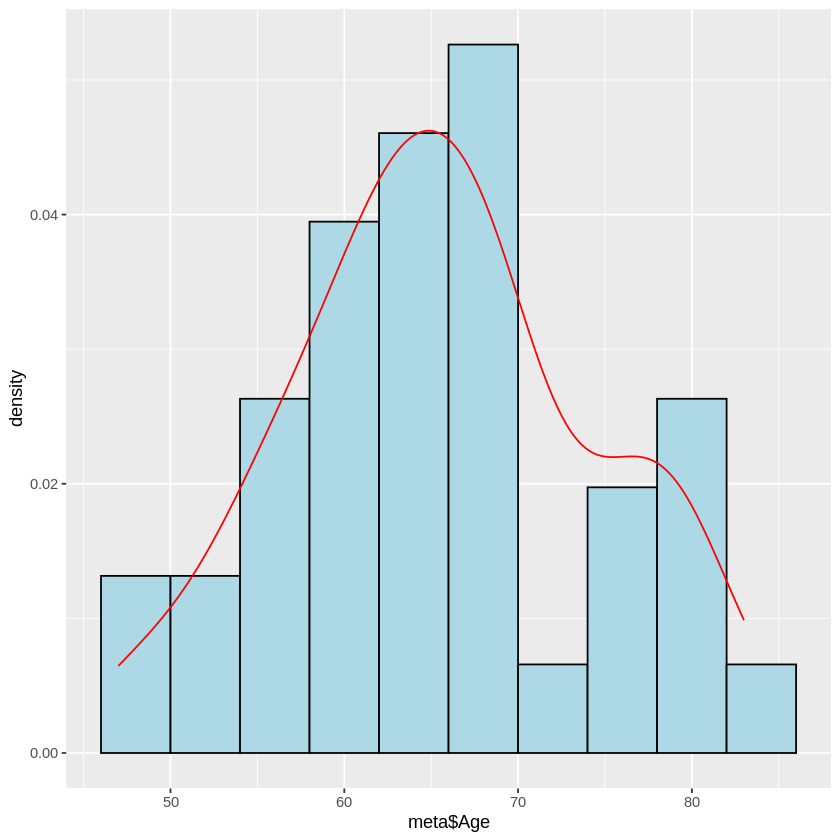

In [17]:
plot_age <- ggplot(data = meta, aes(x = meta$Age)) +
  geom_histogram(aes(y = ..density..), bins = 10, fill = "lightblue", color = "black") + geom_density(color = "red")
print(plot_age)

Warning message:
“Use of `meta$BMI` is discouraged.
ℹ Use `BMI` instead.”
Warning message:
“Use of `meta$BMI` is discouraged.
ℹ Use `BMI` instead.”


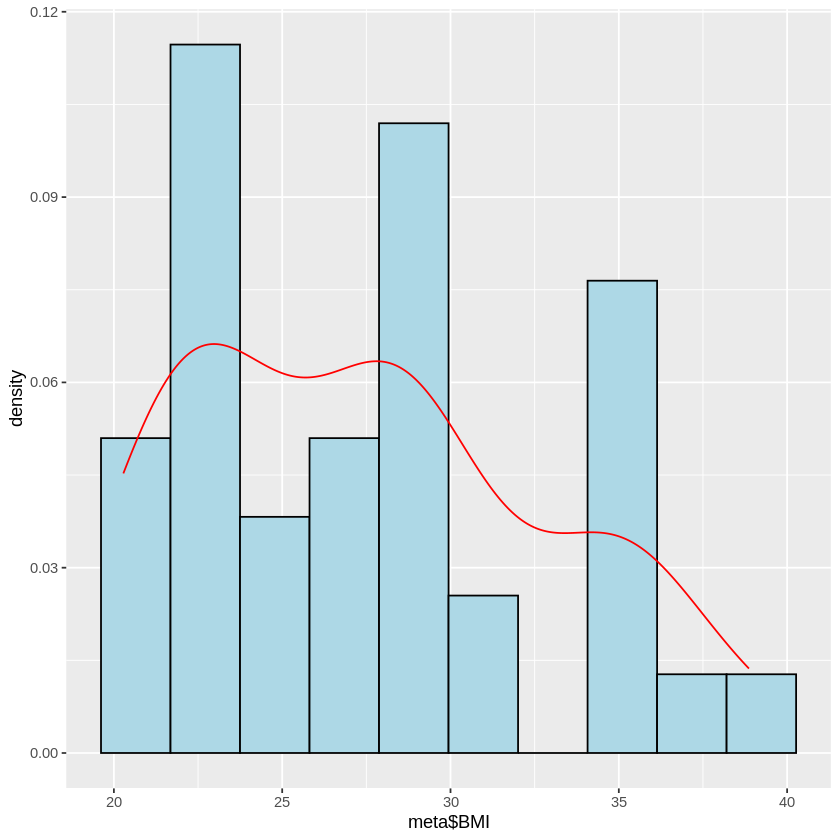

In [18]:
plot_bmi <- ggplot(data = meta, aes(x = meta$BMI)) +
  geom_histogram(aes(y = ..density..), bins = 10, fill = "lightblue", color = "black") + geom_density(color = "red")
print(plot_bmi)

Warning message:
“Use of `meta$Choi...25` is discouraged.
ℹ Use `Choi...25` instead.”
Warning message:
“Use of `meta$Choi...25` is discouraged.
ℹ Use `Choi...25` instead.”


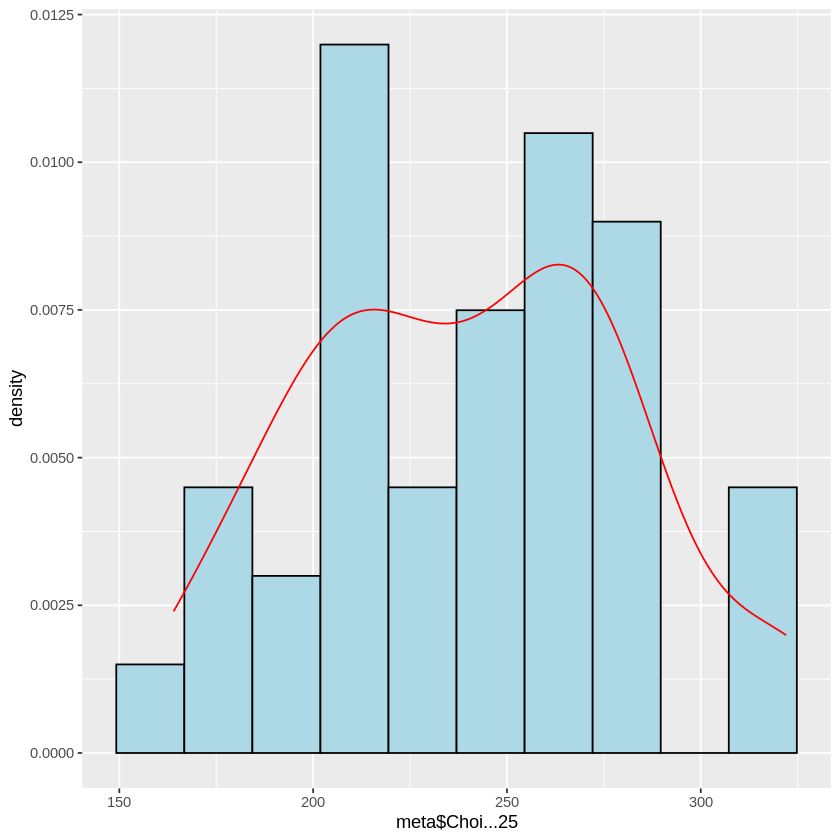

In [19]:
plot_cmi <- ggplot(data = meta, aes(x = meta$Choi...25)) +
  geom_histogram(aes(y = ..density..), bins = 10, fill = "lightblue", color = "black") + geom_density(color = "red")
print(plot_cmi)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


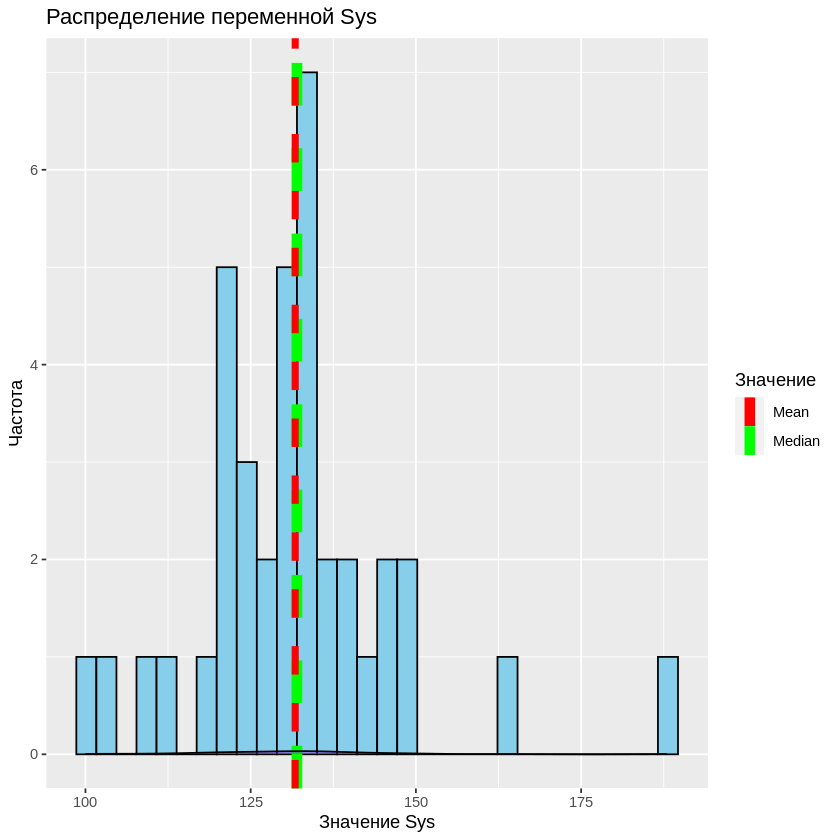

In [20]:
ggplot(data = meta, aes(x = Sys)) +
  geom_histogram(fill = "skyblue", color = "black", bins = 30) +
  geom_vline(aes(xintercept = median(Sys), color = "Median"), linetype = "dashed", size = 3) +
  geom_vline(aes(xintercept = mean(Sys), color = "Mean"), linetype = "dashed", size = 2) +
  geom_density(alpha = 0.4, fill = "purple", color = "black") +
  labs(title = "Распределение переменной Sys", x = "Значение Sys", y = "Частота") +
  scale_color_manual(name = "Значение", values = c("red", "green")) +
  scale_fill_manual(name = "Плотность", values = "purple")


In [23]:
meta$Sys <- as.numeric(meta$Sys)

#Определение типа распределения данных
desc <- descdist(meta$Sys, discrete = FALSE)

#Выбор лучшей модели распределения
best_fit <- fitdist(meta$Sys, "norm")
summary(best_fit)

ERROR: Error in descdist(meta$Sys, discrete = FALSE): could not find function "descdist"


In [25]:
#Создание списка возможных распределений
possible_distributions <- c("norm", "lnorm", " exp", "gamma", "weibull", "logis", "pois")

#Итеративный анализ каждого распределения
fits <- lapply(possible_distribution, function(dist) fitdist(meta$Sys, dist))

#сводная таблица результатов
results_summary <- lapply(fits, summary)
results_summary


ERROR: Error in eval(expr, envir, enclos): object 'possible_distribution' not found


Наименьшее значение AIC соответствует более вероятной модели. Таким образом переменная Sys имеет логистическое распределение

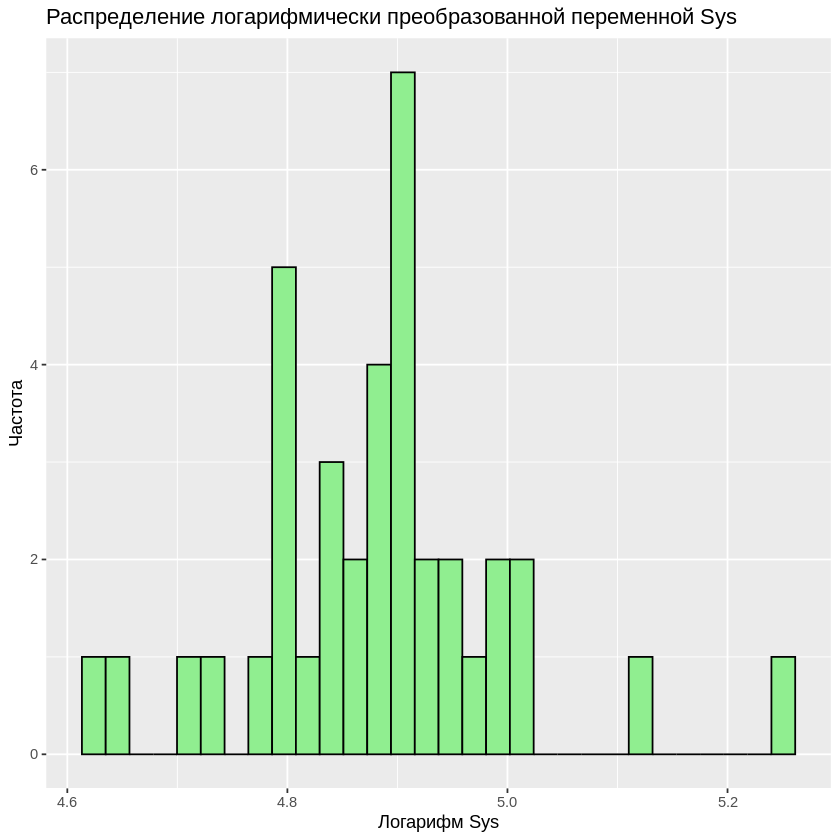

In [26]:
#Логарифмическое преобразование переменноSys
meta$log_Sys <- log(meta$Sys + 1) #Добавляем 1 чтобы не было Log0

#Построение гистограммы для логарифмически препбразованное переменной Sys
ggplot(data = meta, aes(x = log_Sys)) +
  geom_histogram(fill = "lightgreen", color = "black", bins = 30) +
  labs(title = "Распределение логарифмически преобразованной переменной Sys", x = "Логарифм Sys", y = "Частота")


	Shapiro-Wilk normality test

data:  meta$log_Sys
W = 0.95786, p-value = 0.1617


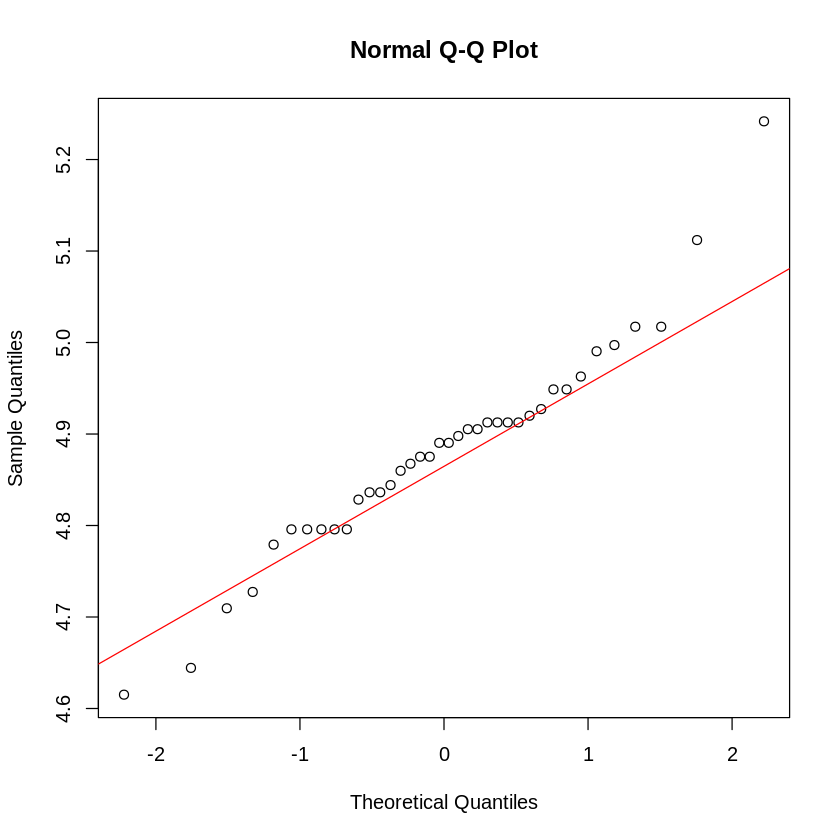

In [27]:
#Построение QQ-графика для переменной inv_Sys
qqnorm(meta$log_Sys)
qqline(meta$log_Sys, col = "red") # Линия нормального распределения

#Тест Шапиро-Уилка на нормальность распределнеия данных
shapiro.test(meta$log_Sys)

In [29]:
#Итеративный анализ каждого распределения
fits_log <- lapply(possible_distributions, function(dist) fitdist(meta$log_Sys, dist))

#Сводная таблица результатов
results_summary_log <- lapply(fits_log, summary)
results_summary_log

ERROR: Error in fitdist(meta$log_Sys, dist): could not find function "fitdist"


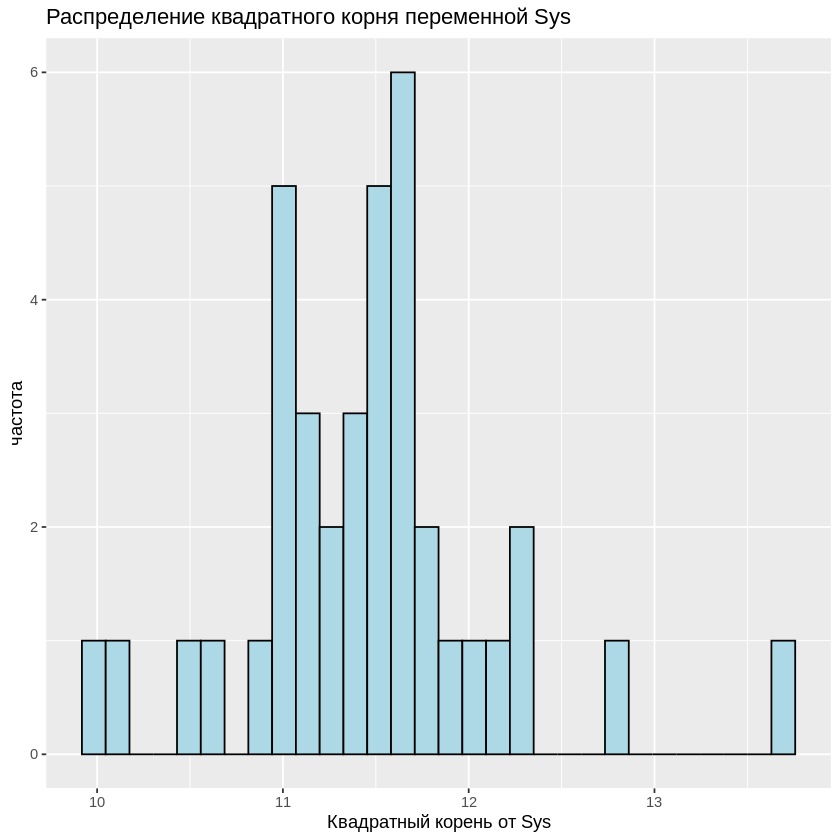

In [30]:
#Применение квадратного корня к переменной Sys
meta$sqrt_Sys <- sqrt(meta$Sys)

#Построение гистограммы для переменной sqrt_Sys
ggplot(data = meta, aes(x = sqrt_Sys)) +
  geom_histogram(fill = "lightblue", color = "black", bins = 30) +
  labs(title = "Распределение квадратного корня переменной Sys", x = "Квадратный корень от Sys", y = "частота")


	Shapiro-Wilk normality test

data:  meta$sqrt_Sys
W = 0.94544, p-value = 0.06305


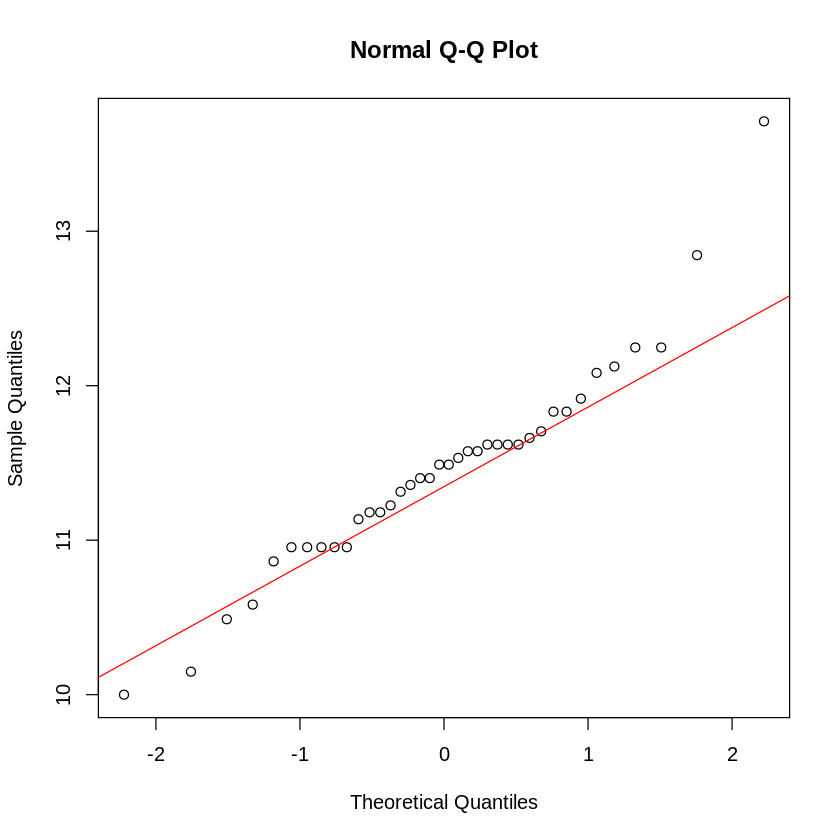

In [31]:
#Построение QQ-графика для переменной inv_Sys
qqnorm(meta$sqrt_Sys)
qqline(meta$sqrt_Sys, col = "red") # Линия нормального распределения

#Тест Шапиро-Уилка на нормальность распределнеия данных
shapiro.test(meta$sqrt_Sys)

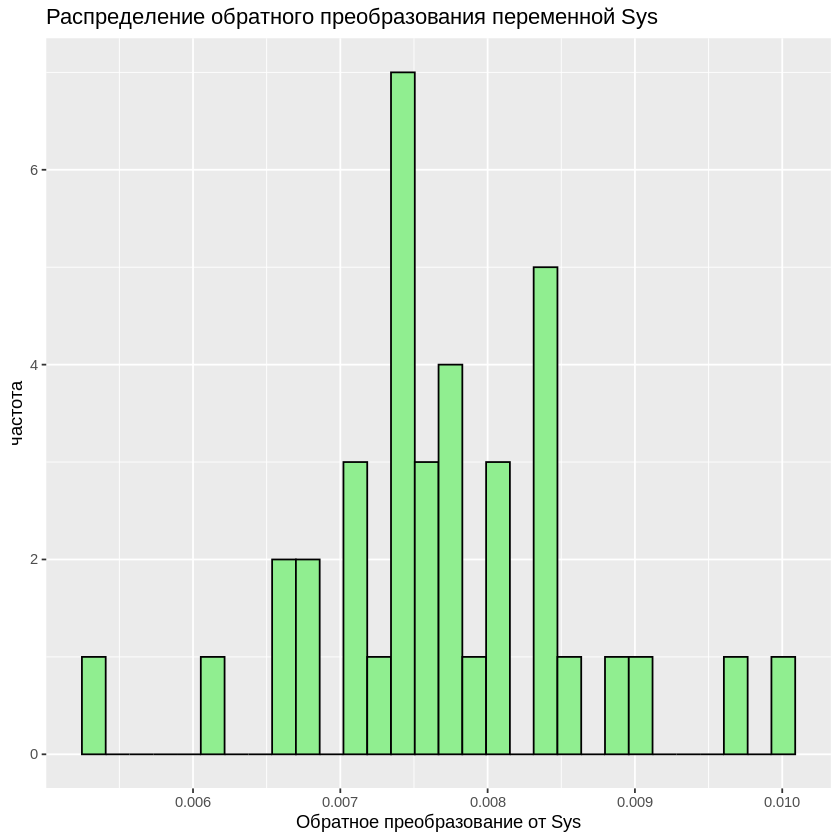

In [32]:
#Применение обратного преобразования к переменной Sys
meta$inv_Sys <- 1/(meta$Sys)

#Построение гистограммы для переменной inv_Sys
ggplot(data = meta, aes(x = inv_Sys)) +
  geom_histogram(fill = "lightgreen", color = "black", bins = 30) +
  labs(title = "Распределение обратного преобразования переменной Sys", x = "Обратное преобразование от Sys", y = "частота")

In [35]:
#установка и подключение пакета car
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pbkrtest’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




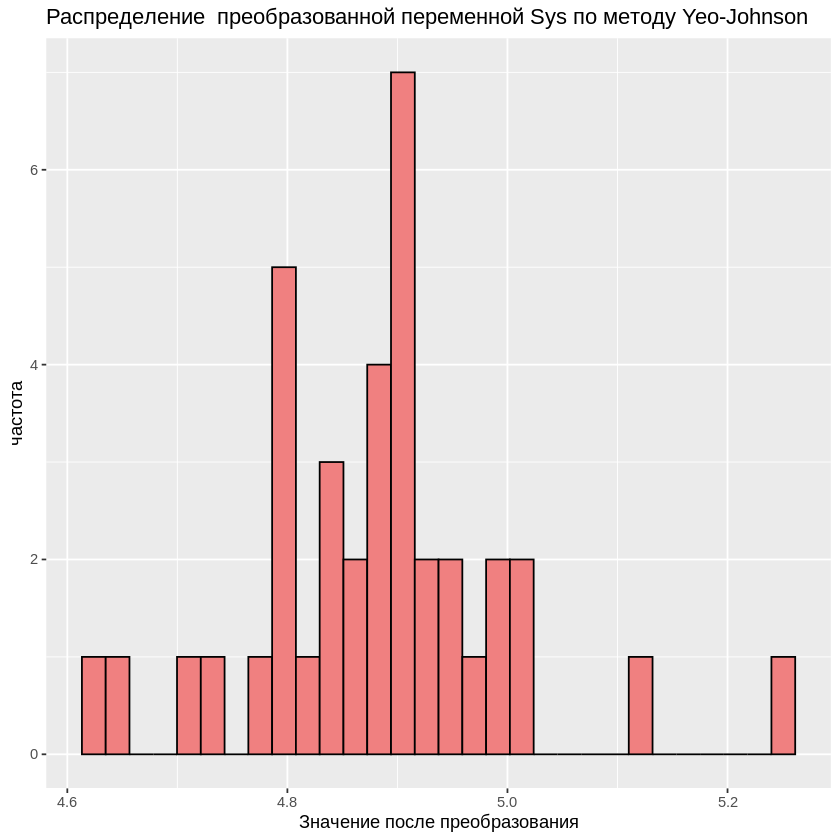

In [37]:
# Преобразование переменной Sys с использованием преобразования Йео-Джонсона
meta$yj_Sys <- yjPower(meta$Sys, 0)

#Построение гистограммы для переменной yj_Sys (преобразованной переменной)
ggplot(data = meta, aes(x = yj_Sys)) +
  geom_histogram(fill = "lightcoral", color = "black", bins = 30) +
  labs(title = "Распределение  преобразованной переменной Sys по методу Yeo-Johnson", x = "Значение после преобразования", y = "частота")


	Shapiro-Wilk normality test

data:  meta$inv_Sys
W = 0.96395, p-value = 0.2545


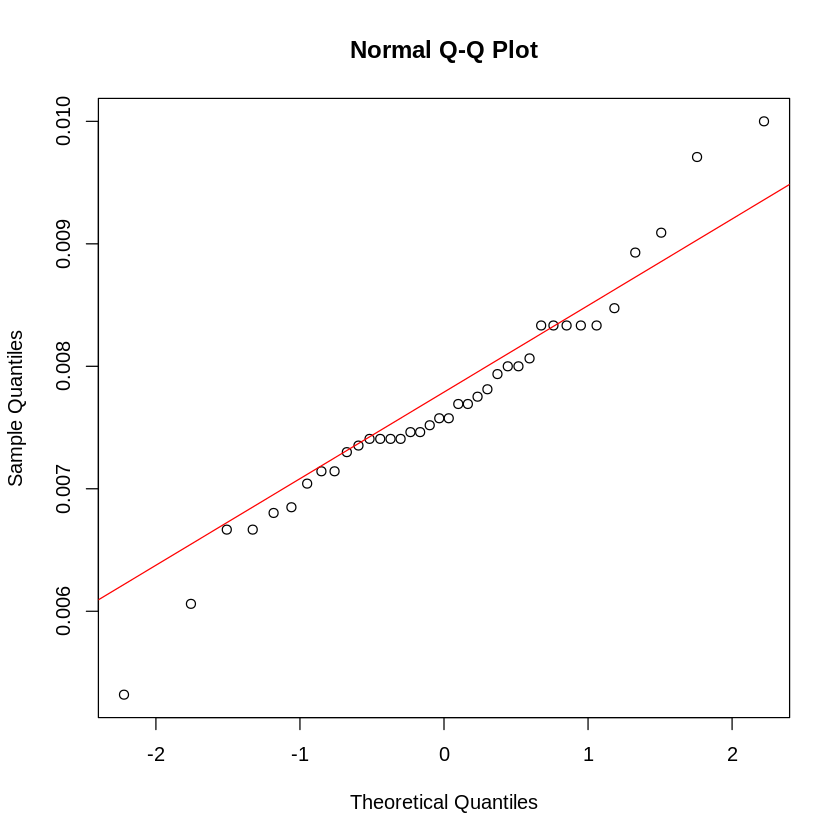

In [38]:
#Построение QQ-графика для переменной inv_Sys
qqnorm(meta$inv_Sys)
qqline(meta$inv_Sys, col = "red") # Линия нормального распределения

#Тест Шапиро-Уилка на нормальность распределнеия данных
shapiro.test(meta$inv_Sys)

В случае с логистическим распределением переменной Sys лучшим способом приведения к нормальности стал вариант использования обратного преобразованияю В этом случае при проверке на нормальность с помощью теста Шапиро-Уилка мы получаем наибольшее значение статистики W=0.96395

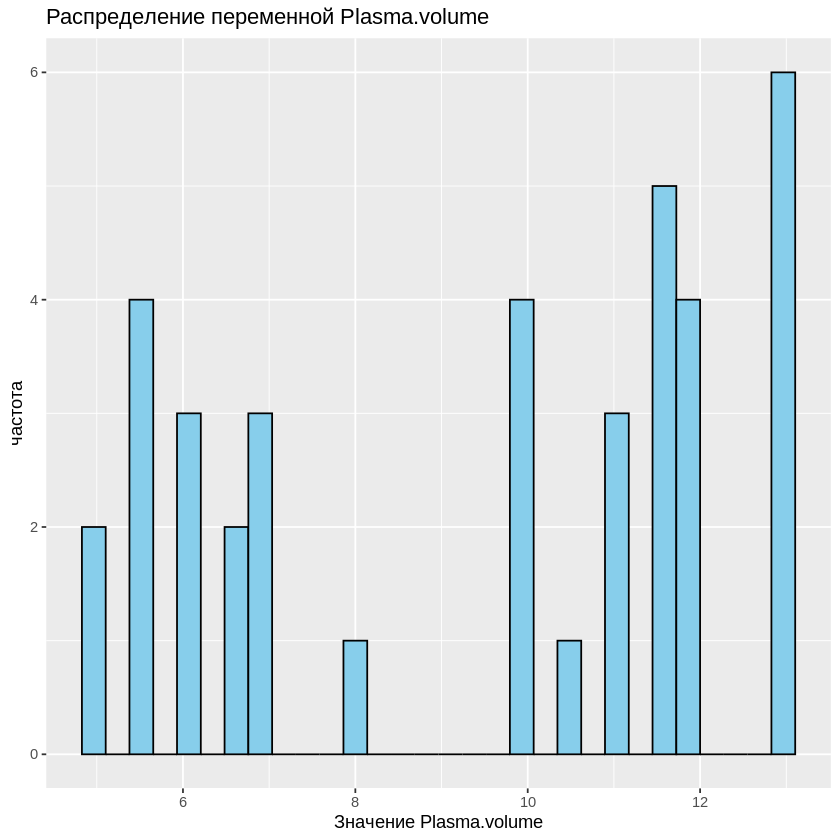

In [39]:
ggplot(data = meta, aes(x = Plasma.volume)) +
  geom_histogram(fill = "skyblue", color = "black", bins = 30) +
  labs(title = "Распределение переменной Plasma.volume", x = "Значение Plasma.volume", y = "частота")


	Shapiro-Wilk normality test

data:  meta$Plasma.volume
W = 0.86593, p-value = 0.0003179


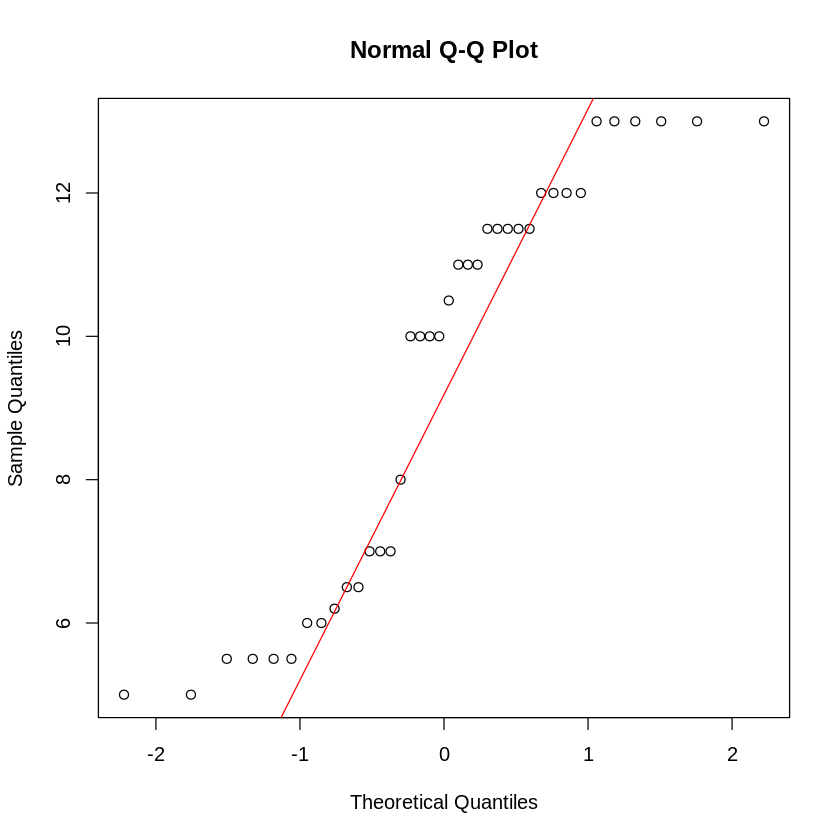

In [40]:
#Построение QQ-графика для переменной inv_Sys
qqnorm(meta$Plasma.volume)
qqline(meta$Plasma.volume, col = "red") # Линия нормального распределения

#Тест Шапиро-Уилка на нормальность распределнеия данных
shapiro.test(meta$Plasma.volume)

In [41]:
possible_distributions <- c("norm", "lnorm", " exp", "gamma", "weibull", "logis", "cauchy")

#Итеративный анализ каждого распределения
fits <- lapply(possible_distribution, function(dist) fitdist(meta$Plasma.volume, dist))

#сводная таблица результатов
results_summary <- lapply(fits, summary)
results_summary

ERROR: Error in eval(expr, envir, enclos): object 'possible_distribution' not found


Для автоматической проверки доступны не все виды распределений. Возможно это бимодальное распределение. У меня не получилось подогнать его под нормальное.

In [45]:
data <- meta$Plasma.volume

#Проверка на соответствие со статистическим тестом
weibull_test <- gofstat(fitdist(data, "weibull"))

#Визуализируем распределение данных и плотности распледеления Вейбулла

ggplot(data.frame(x=data), aes(x)) +
  geom_histogram(aes(y = ..density..), fill = "lightblue", color = "black", bins = 30) +
  stat_function(fun = dweibull, args = fitdist(data, "weibull")$estimate, color = "red", size=1.5) +
  labs(title = "Соответствие данных распределению Вейбулла", x = "Значение", y = "Плотность") +
  theme_minimal()

#вывод результатов теста
print(weibull_test)



ERROR: Error in gofstat(fitdist(data, "weibull")): could not find function "gofstat"


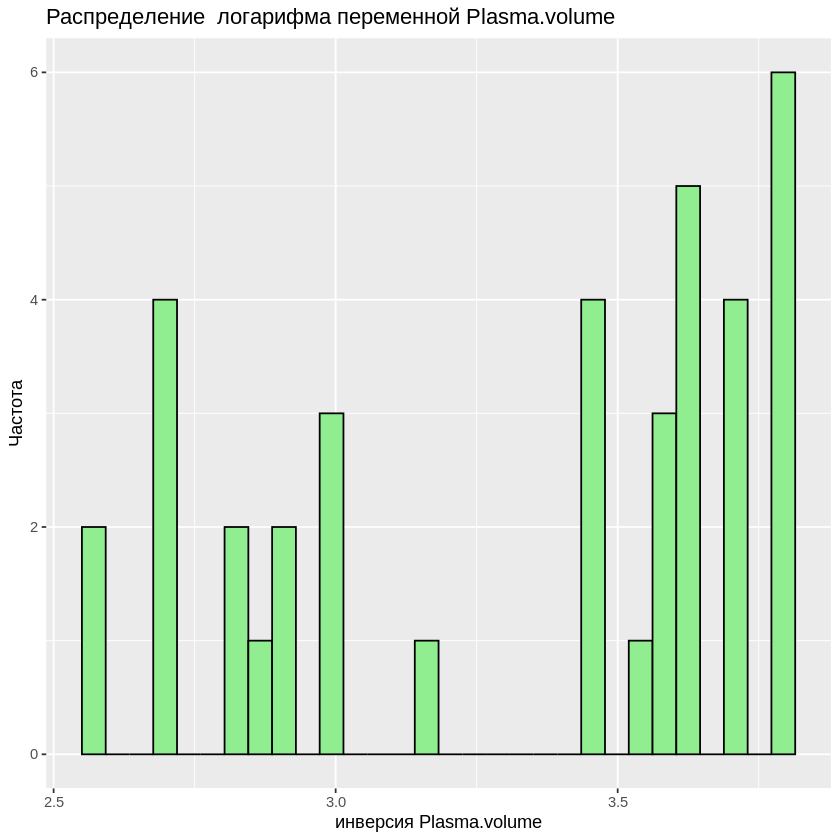

In [46]:
#Логарифмирование переменной Sys
meta$inv_Plasma.volume <- log2(meta$Plasma.volume + 1) #Добавляем 1 чтобы не было log0

#Построение гистограммы для обратного преобразования переменной Plasma.volume
ggplot(data = meta, aes(x = inv_Plasma.volume)) +
  geom_histogram(fill = "lightgreen", color = "black", bins = 30) +
  labs(title = "Распределение  логарифма переменной Plasma.volume", x = "инверсия Plasma.volume", y = "Частота")


	Shapiro-Wilk normality test

data:  meta$inv_Plasma.volume
W = 0.85112, p-value = 0.0001386


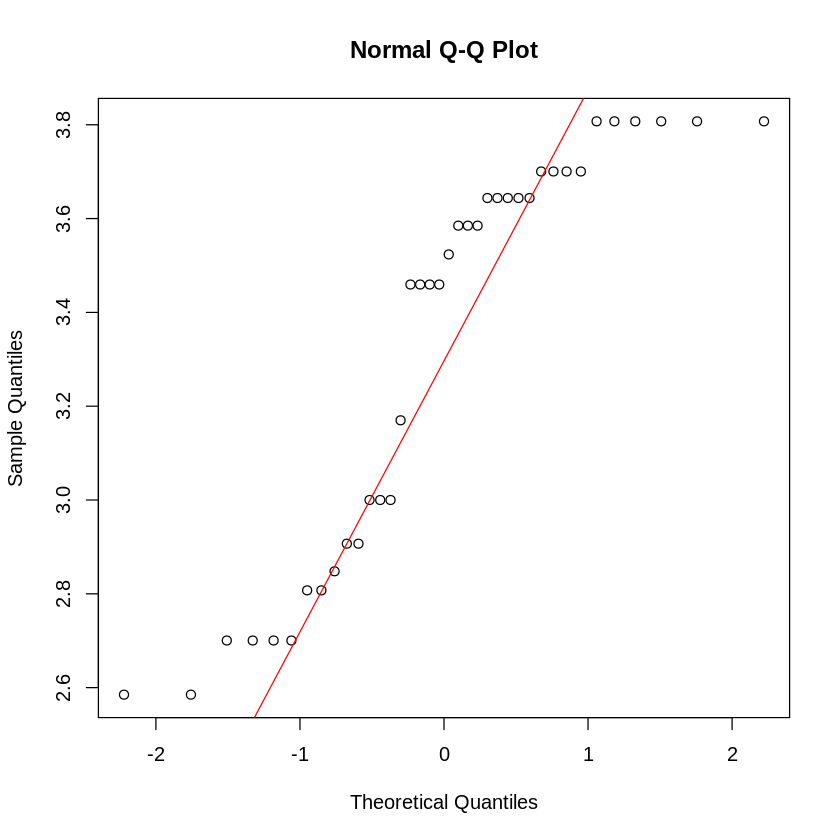

In [47]:
#Построение QQ-графика для переменной inv_Sys
qqnorm(meta$inv_Plasma.volume)
qqline(meta$inv_Plasma.volume, col = "red") # Линия нормального распределения

#Тест Шапиро-Уилка на нормальность распределнеия данных
shapiro.test(meta$inv_Plasma.volume)

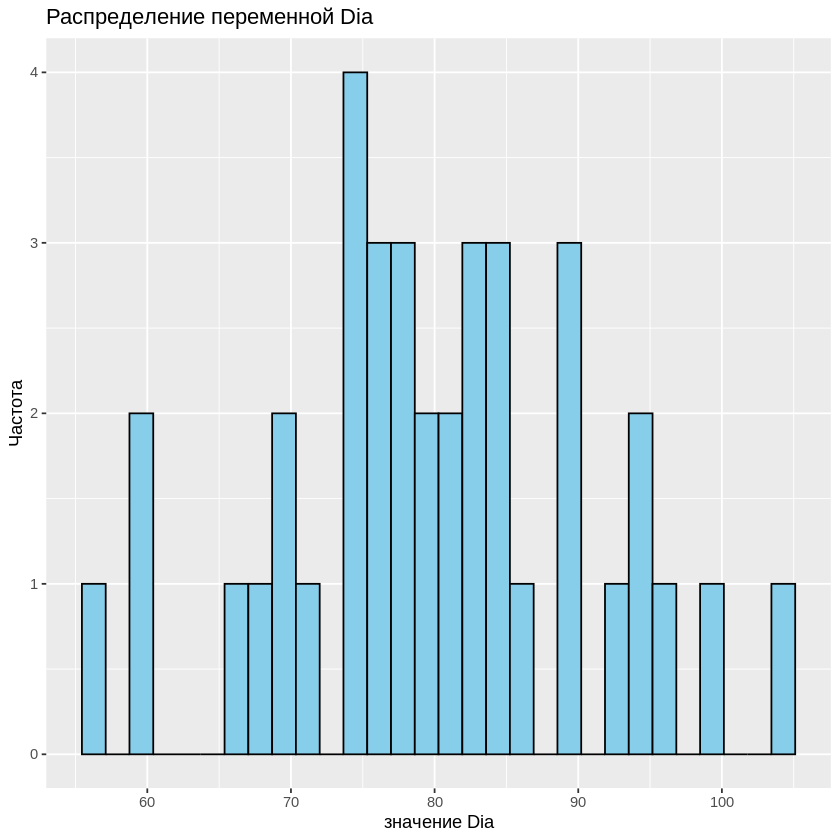

In [48]:
ggplot(data = meta, aes(x = Dia)) +
  geom_histogram(fill = "skyblue", color = "black", bins = 30) +
  labs(title = "Распределение переменной Dia", x = "значение Dia", y = "Частота")